In [36]:
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [24]:
dfraw=pd.read_csv('castle-solutions-4.csv.txt', dtype=str)

In [25]:
def valid_int(x):
    if re.match("^\d+$", x):
        return int(x)
    else:
        return None

def clean(df):
    for i in range(1, 11):
        df[f"C{i}"]=df[f"Castle {i}"].apply(valid_int)
    df2 = df[~pd.isnull(df).any(axis=1)][[f"C{i}" for i in range(1, 11)]]
    df3 = df2[df2.sum(axis=1)==100.0]
    return df3

dfclean=clean(dfraw)
dfclean

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,0.0,0.0,12.0,1.0,1.0,23.0,3.0,3.0,33.0,24.0
2,0.0,0.0,0.0,10.0,13.0,15.0,18.0,20.0,24.0,0.0
4,0.0,12.0,0.0,0.0,20.0,21.0,23.0,24.0,0.0,0.0
5,1.0,2.0,2.0,4.0,8.0,12.0,14.0,16.0,19.0,22.0
6,0.0,0.0,0.0,5.0,15.0,20.0,20.0,18.0,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1008,2.0,5.0,8.0,14.0,2.0,2.0,2.0,31.0,2.0,32.0
1009,3.0,3.0,5.0,6.0,11.0,13.0,24.0,3.0,29.0,3.0
1010,0.0,5.0,7.0,12.0,12.0,21.0,1.0,31.0,4.0,7.0
1011,0.0,0.0,0.0,5.0,15.0,8.0,4.0,13.0,30.0,25.0


In [4]:
def battle(df, n1, n2):
    row1 = df.loc[n1]
    row2 = df.loc[n2]
    #print(row1)
    #print(row2)
    score1 = 0
    score2 = 0
    for i in range(1, 11):
        ki = f"C{i}"
        if row1[ki] > row2[ki]:
            score1 += i
        elif row1[ki] < row2[ki]:
            score2 += i
    #print(f"score1: {score1}")
    #print(f"score2: {score2}")
    return (score1, score2)
    
battle(df3, 0, 2)

(28, 24)

In [27]:
def battle_all(df, outfile):
    d={}

    for n1 in df.index:
        d[n1]=[0,0,0]
    #print(d)

    for i, n1 in enumerate(df.index[:-1]):
        print(n1)
        for n2 in df.index[i+1:]:
            score1, score2 = battle(df, n1, n2)
            if score1 > score2:
                d[n1][0] += 1
                d[n2][1] += 1
            elif score2 > score1:
                d[n2][0] += 1
                d[n1][1] += 1
            else:
                d[n1][2] += 1
                d[n2][2] += 1

    dfscore = pd.DataFrame.from_dict(data=d, orient='index', columns=['win', 'loss', 'tie'])
    pd.concat([df, dfscore], axis=1).to_csv(outfile)

outfile="castle-solutions-4-with-scores.csv"
#battle_all(dfclean, outfile)
dfscore=pd.read_csv(outfile, index_col=0)
dfscore

0
2
4
5
6
7
8
9
10
11
12
13
14
15
16
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
52
53
54
55
56
57
58
59
60
61
62
63
64
66
67
68
69
70
71
72
73
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
99
100
101
102
103
104
105
106
107
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
181
182
183
184
185
186
187
188
189
190
192
193
194
195
196
197
198
199
200
201
202
203
204
205
207
208
209
210
211
212
213
214
215
216
217
218
219
222
223
224
225
226
227
228
229
230
232
233
234
236
237
238
239
241
242
243
245
246
247
248
250
251
252
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
277
278
279
280
281
282
285
286
287
288
289
290
291
292
294
295
296
297
298
299
3

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,win,loss,tie
0,0.0,0.0,12.0,1.0,1.0,23.0,3.0,3.0,33.0,24.0,729,193,15
2,0.0,0.0,0.0,10.0,13.0,15.0,18.0,20.0,24.0,0.0,370,558,9
4,0.0,12.0,0.0,0.0,20.0,21.0,23.0,24.0,0.0,0.0,547,378,12
5,1.0,2.0,2.0,4.0,8.0,12.0,14.0,16.0,19.0,22.0,209,713,15
6,0.0,0.0,0.0,5.0,15.0,20.0,20.0,18.0,22.0,0.0,369,546,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,2.0,5.0,8.0,14.0,2.0,2.0,2.0,31.0,2.0,32.0,655,196,86
1009,3.0,3.0,5.0,6.0,11.0,13.0,24.0,3.0,29.0,3.0,488,436,13
1010,0.0,5.0,7.0,12.0,12.0,21.0,1.0,31.0,4.0,7.0,667,263,7
1011,0.0,0.0,0.0,5.0,15.0,8.0,4.0,13.0,30.0,25.0,443,483,11


In [28]:
dfscore

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,win,loss,tie
0,0.0,0.0,12.0,1.0,1.0,23.0,3.0,3.0,33.0,24.0,729,193,15
2,0.0,0.0,0.0,10.0,13.0,15.0,18.0,20.0,24.0,0.0,370,558,9
4,0.0,12.0,0.0,0.0,20.0,21.0,23.0,24.0,0.0,0.0,547,378,12
5,1.0,2.0,2.0,4.0,8.0,12.0,14.0,16.0,19.0,22.0,209,713,15
6,0.0,0.0,0.0,5.0,15.0,20.0,20.0,18.0,22.0,0.0,369,546,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,2.0,5.0,8.0,14.0,2.0,2.0,2.0,31.0,2.0,32.0,655,196,86
1009,3.0,3.0,5.0,6.0,11.0,13.0,24.0,3.0,29.0,3.0,488,436,13
1010,0.0,5.0,7.0,12.0,12.0,21.0,1.0,31.0,4.0,7.0,667,263,7
1011,0.0,0.0,0.0,5.0,15.0,8.0,4.0,13.0,30.0,25.0,443,483,11


<ipython-input-42-dee251fc982f>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


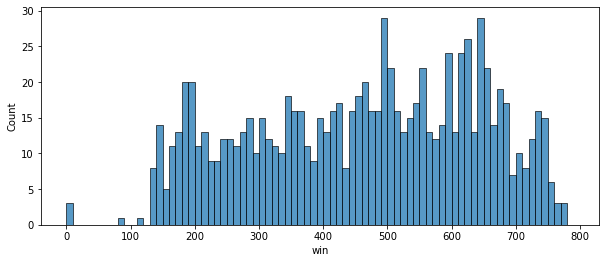

In [42]:
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(dfscore["win"], bins=range(0, 800, 10), ax=ax)
fig.show()